# TASK 1

Insights:
1. Regional Revenue Distribution:
   - South America leads with $219,352
   - Consistent performance across Europe, North America, and Asia
   - Potential for targeted regional expansion strategies

2. Product Category Analysis:
   - Clothing: Highest average order value ($728.82)
   - Electronics: Strong sales volume (254 transactions, $180,783 revenue)
   - Books: Most frequent transactions (270)
   - Home Decor: Opportunity for value-added product strategies

3. Customer Purchase Behavior:
   - Core customer base makes 3-6 purchases
   - Peak purchase frequency: 5 transactions (42 customers)
   - Indicates strong customer retention potential




=== Customers Statistics ===
Shape: (200, 4)

Missing Values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Basic Statistics:
                SignupDate
count                  200
mean   2023-07-19 08:31:12
min    2022-01-22 00:00:00
25%    2022-09-26 12:00:00
50%    2023-08-31 12:00:00
75%    2024-04-12 12:00:00
max    2024-12-28 00:00:00

=== Products Statistics ===
Shape: (100, 4)

Missing Values:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Basic Statistics:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000

=== Transactions Statistics ===
Shape: (1000, 7)

Missing Values:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Basic Statistics:
                     TransactionDate     Quanti

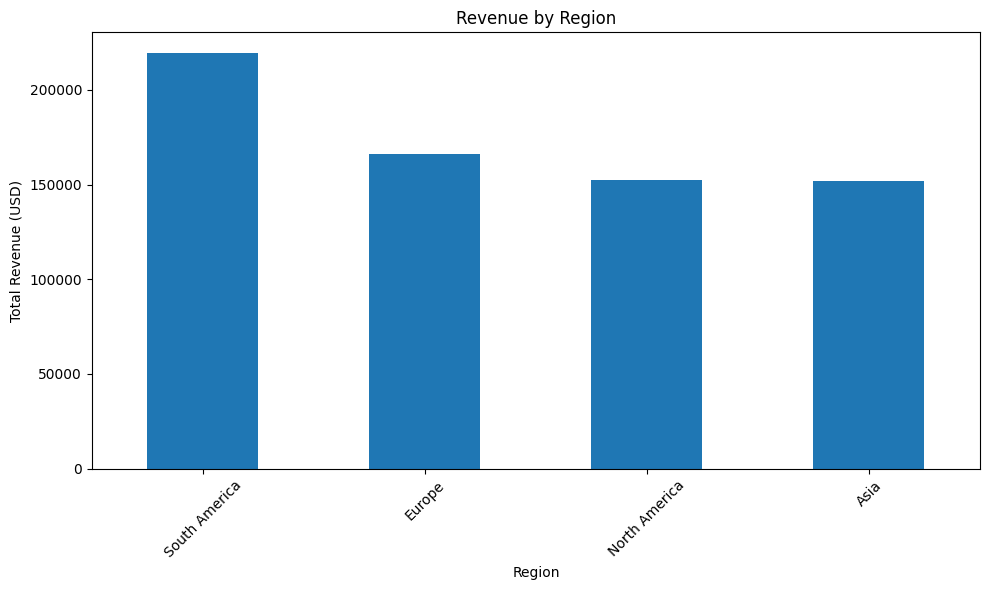

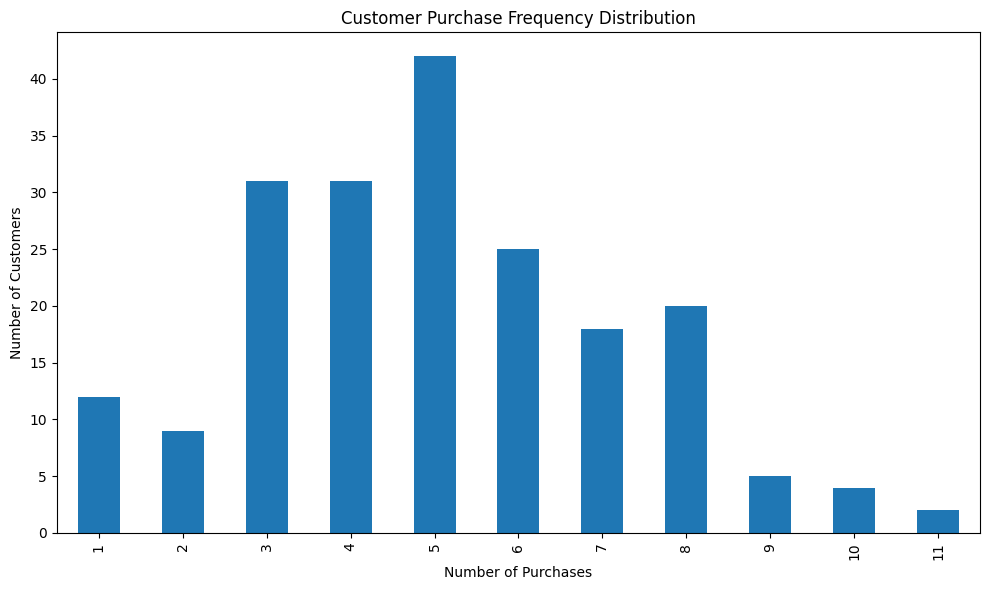

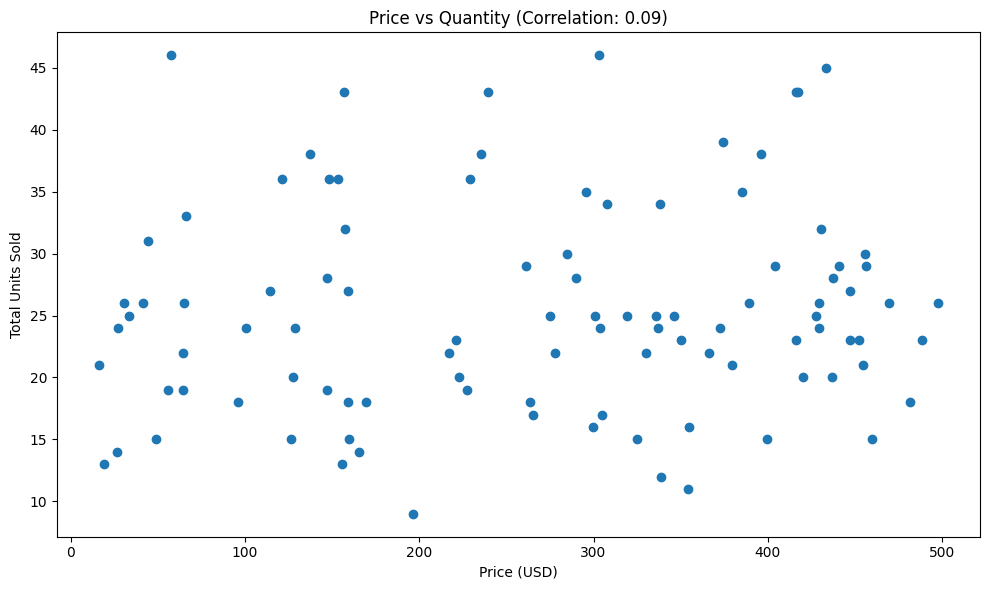


Key Business Insights:

1. Regional Performance:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64

2. Category Performance:
             Number of Sales  Total Revenue  Total Units Sold  \
Category                                                        
Books                    270      192147.47               681   
Clothing                 228      166170.66               590   
Electronics              254      180783.50               627   
Home Decor               248      150893.93               639   

             Average Order Value  
Category                          
Books                     711.66  
Clothing                  728.82  
Electronics               711.75  
Home Decor                608.44  

3. Retention Rates:
MonthsFromSignup  -11  -10  -9   -8   -7   -6   -5   -4   -3   -2   ...   26  \
CohortMonth                                                         ...   

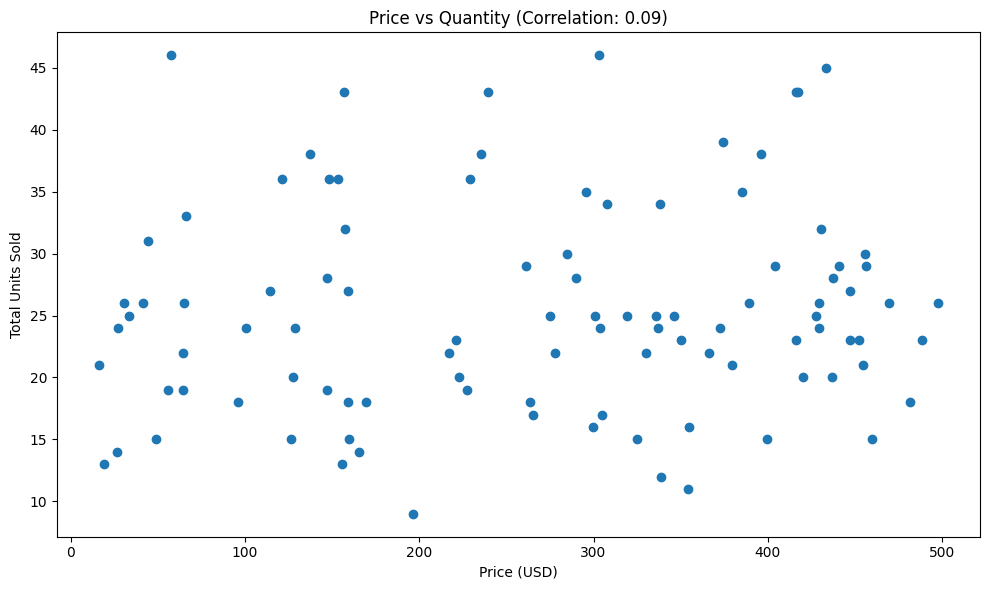


Price-Quantity Correlation: 0.093

Top 5 Products by Sales Volume:
   ProductID  Price_y  Quantity
58      P059   303.20        46
53      P054    57.30        46
28      P029   433.64        45
78      P079   417.37        43
60      P061   156.96        43


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

# Read datasets
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Basic EDA Functions
def get_basic_stats(df, name):
    """Print basic statistics for a dataframe"""
    print(f"\n=== {name} Statistics ===")
    print(f"Shape: {df.shape}")
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nBasic Statistics:")
    print(df.describe())

# Perform basic EDA
get_basic_stats(customers, "Customers")
get_basic_stats(products, "Products")
get_basic_stats(transactions, "Transactions")

# Analysis 1: Revenue by Region
def analyze_revenue_by_region():
    revenue_by_region = transactions.merge(customers, on='CustomerID')\
        .groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    revenue_by_region.plot(kind='bar')
    plt.title('Revenue by Region')
    plt.xlabel('Region')
    plt.ylabel('Total Revenue (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return revenue_by_region

# Analysis 2: Product Category Performance
def analyze_category_performance():
    category_metrics = transactions.merge(products, on='ProductID')\
        .groupby('Category').agg({
            'TransactionID': 'count',
            'TotalValue': 'sum',
            'Quantity': 'sum'
        }).round(2)

    category_metrics.columns = ['Number of Sales', 'Total Revenue', 'Total Units Sold']
    category_metrics['Average Order Value'] = (category_metrics['Total Revenue'] /
                                             category_metrics['Number of Sales']).round(2)

    return category_metrics

# Analysis 3: Customer Cohort Analysis
def perform_cohort_analysis():
    # Create cohort based on signup month
    customers['CohortMonth'] = customers['SignupDate'].dt.to_period('M')

    # Merge with transactions
    cohort_data = transactions.merge(customers[['CustomerID', 'CohortMonth']], on='CustomerID')
    cohort_data['TransactionMonth'] = cohort_data['TransactionDate'].dt.to_period('M')

    # Calculate months since signup
    cohort_data['MonthsFromSignup'] = (cohort_data['TransactionMonth'] -
                                      cohort_data['CohortMonth']).apply(lambda x: x.n)

    # Create cohort table
    cohort_table = cohort_data.groupby(['CohortMonth', 'MonthsFromSignup'])['CustomerID']\
        .nunique().reset_index()
    cohort_table = cohort_table.pivot(index='CohortMonth',
                                     columns='MonthsFromSignup',
                                     values='CustomerID')

    # Calculate retention rates
    cohort_size = cohort_table[0]
    retention_table = cohort_table.div(cohort_size, axis=0) * 100

    return retention_table

# Analysis 4: Customer Purchase Frequency
def analyze_purchase_frequency():
    purchase_freq = transactions.groupby('CustomerID')['TransactionID'].count()\
        .value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    purchase_freq.plot(kind='bar')
    plt.title('Customer Purchase Frequency Distribution')
    plt.xlabel('Number of Purchases')
    plt.ylabel('Number of Customers')
    plt.tight_layout()
    plt.show()

    return purchase_freq

# Analysis 5: Product Price Sensitivity
def analyze_price_sensitivity():
    # Merge transactions with products
    merged_data = transactions.merge(products, on='ProductID')

    # Analyze price vs quantity relationship
    price_analysis = merged_data.groupby(['ProductID', 'Price_y']).agg({
        'Quantity': 'sum'
    }).reset_index()

    # Calculate correlation coefficient
    correlation = np.corrcoef(price_analysis['Price_y'], price_analysis['Quantity'])[0,1]

    # Visualization
    plt.figure(figsize=(10, 6))
    plt.scatter(price_analysis['Price_y'], price_analysis['Quantity'])
    plt.title(f'Price vs Quantity (Correlation: {correlation:.2f})')
    plt.xlabel('Price (USD)')
    plt.ylabel('Total Units Sold')
    plt.tight_layout()
    plt.show()

    # Return analysis results
    return {
        'correlation': correlation,
        'data': price_analysis.sort_values('Quantity', ascending=False)
    }

# Run analyses
revenue_by_region = analyze_revenue_by_region()
category_performance = analyze_category_performance()
retention_rates = perform_cohort_analysis()
purchase_frequency = analyze_purchase_frequency()
price_sensitivity = analyze_price_sensitivity()

# Print key insights
print("\nKey Business Insights:")
print("\n1. Regional Performance:")
print(revenue_by_region)
print("\n2. Category Performance:")
print(category_performance)
print("\n3. Retention Rates:")
print(retention_rates.head())
print("\n4. Purchase Frequency Distribution:")
print(purchase_frequency)
print("\n5. Price Sensitivity Analysis:")
results = analyze_price_sensitivity()
print("\nPrice-Quantity Correlation:", results['correlation'].round(3))
print("\nTop 5 Products by Sales Volume:")
print(results['data'].head())